#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

- Use only the following columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value',
- 'ocean_proximity'

- Fill NAs with 0.

- Apply the log tranform to median_house_value.

- Do train/validation/test split with 60%/20%/20% distribution.

- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer to turn the dataframe into matrices.

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [37]:
df.shape

(20640, 10)

In [38]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
#### select relevant columns
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income',
   'median_house_value','ocean_proximity']]

In [40]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [99]:
df = df.fillna(0)
df['median_house_value'] = np.log(df['median_house_value'])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(full_train_df, test_size=.25, random_state=1)

In [104]:
print(full_train_df.shape, train_df.shape, val_df.shape, test_df.shape)

(16512, 10) (12384, 10) (4128, 10) (4128, 10)


In [243]:
X_train = train_df.drop('median_house_value', axis = 1)
X_train = X_train.to_dict(orient='records')
y_train = train_df.median_house_value

X_val = val_df.drop('median_house_value', axis = 1)
X_val = X_val.to_dict(orient='records')
y_val = val_df.median_house_value

X_test = test_df.drop('median_house_value', axis = 1)
X_test = X_test.to_dict(orient='records')
y_test = test_df.median_house_value

X_train_full = full_train_df.drop('median_house_value', axis = 1)
X_train_full = X_train_full.to_dict(orient='records')
y_train_full = full_train_df.median_house_value

In [266]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False, sort=False)

In [269]:
X_train = dv.fit_transform(X_train)

#### Question 1
- Let's train a decision tree regressor to predict the median_house_value variable.

- Train a model with max_depth=1.

In [271]:
from sklearn.tree import DecisionTreeRegressor

In [314]:
decision_tree = DecisionTreeRegressor(max_depth=1)

In [315]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [316]:
from sklearn.tree import export_text

In [323]:
print(export_text(decision_tree, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [2.51]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [2.45]



In [325]:
from sklearn.metrics import mean_squared_error
decision_tree_pred = decision_tree.predict(dv.transform(X_val))

In [360]:
np.sqrt(mean_squared_error(y_val, decision_tree_pred))

0.038829523059324716

#### Question 2

- Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)


In [361]:
from sklearn.ensemble import RandomForestRegressor

In [362]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [363]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [364]:
random_forest_pred = random_forest.predict(dv.transform(X_val))
MSE = mean_squared_error(y_val, random_forest_pred)

In [372]:
np.sqrt(MSE)

0.02040443025687764

#### Question 3
- Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

In [377]:
scores = []
for n in range(10,201, 10):
    random_forest = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    random_forest.fit(X_train, y_train)    
    random_forest_pred = random_forest.predict(dv.transform(X_val))
    MSE = mean_squared_error(y_val, random_forest_pred)    
    
    RMSE = np.sqrt(MSE)
    
    scores.append((n, RMSE))
    

In [403]:
scores_df = pd.DataFrame(scores, columns=['n_estimator', 'RMSE'])

In [416]:
scores_df['RMSE_3dp'] = np.round(scores_df['RMSE'], 3)

In [417]:
scores_df

,n_estimator,RMSE,RMSE_3dp
0,10,0.020404,0.020
1,20,0.019905,0.020
2,30,0.019638,0.020
3,40,0.019562,0.020
4,50,0.019453,0.019
5,60,0.019417,0.019
6,70,0.019387,0.019
7,80,0.019369,0.019
8,90,0.019365,0.019
9,100,0.019347,0.019


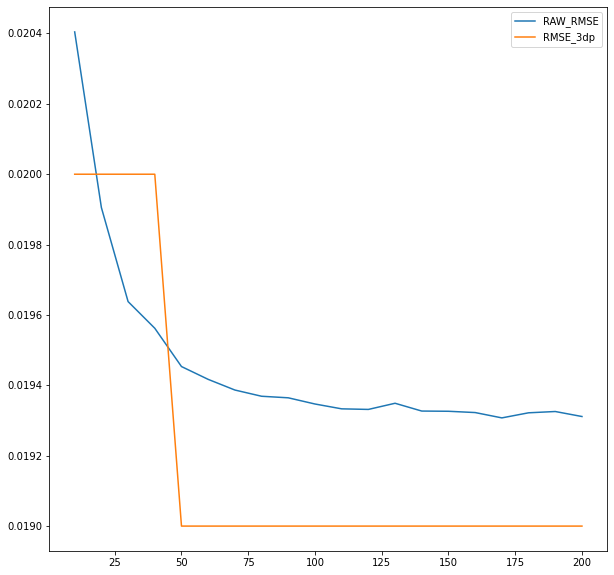

In [415]:
plt.figure(figsize=(10,10))
plt.plot(scores_df.n_estimator, scores_df.RMSE, label = 'RAW_RMSE')
plt.plot(scores_df.n_estimator, scores_df.RMSE_3dp,  label = 'RMSE_3dp')
plt.legend()

#### Question 4
- Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
- Fix the random seed: random_state=1

In [437]:
scores = []
for max_depth in [10, 15, 20, 25]:
    for n_estimator in range(10,201, 10):
        random_forest = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, random_state=1, n_jobs=-1)
        random_forest.fit(X_train, y_train)    
        random_forest_pred = random_forest.predict(dv.transform(X_val))
        MSE = mean_squared_error(y_val, random_forest_pred)    

        RMSE = np.sqrt(MSE)

        scores.append((max_depth, n_estimator, RMSE))
    

In [438]:
scores_df = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'RMSE'])

In [441]:
scores_df.tail(20)

,max_depth,n_estimators,RMSE
60,25,10,0.020311
61,25,20,0.019868
62,25,30,0.019618
63,25,40,0.019563
64,25,50,0.019444
65,25,60,0.019416
66,25,70,0.019393
67,25,80,0.019365
68,25,90,0.019357
69,25,100,0.019338


In [442]:
scores_df.pivot(index="max_depth", columns="n_estimators", values="RMSE")

n_estimators,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
max_depth,,,,,,,,,,,,,,,,,,,,
10,0.021140,0.021017,0.020933,0.020920,0.020856,0.020835,0.020828,0.020811,0.020793,0.020777,0.020764,0.020778,0.020789,0.020788,0.020784,0.020777,0.020769,0.020777,0.020779,0.020773
15,0.020446,0.020038,0.019766,0.019708,0.019607,0.019589,0.019564,0.019553,0.019543,0.019517,0.019500,0.019511,0.019520,0.019498,0.019495,0.019496,0.019487,0.019493,0.019494,0.019483
20,0.020317,0.019889,0.019648,0.019574,0.019481,0.019457,0.019428,0.019419,0.019406,0.019382,0.019369,0.019364,0.019380,0.019350,0.019346,0.019343,0.019328,0.019341,0.019343,0.019328
25,0.020311,0.019868,0.019618,0.019563,0.019444,0.019416,0.019393,0.019365,0.019357,0.019338,0.019330,0.019335,0.019346,0.019328,0.019324,0.019325,0.019315,0.019326,0.019328,0.019315


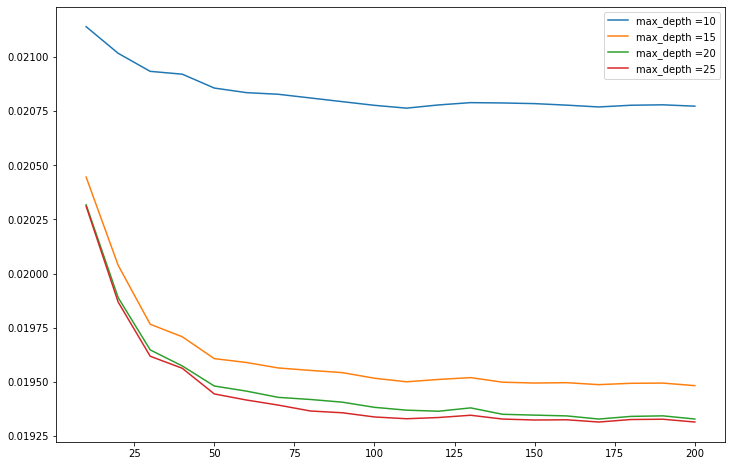

In [449]:
plt.figure(figsize=(12,8))
for d in [10, 15, 20, 25]:
    df_subset = scores_df[scores_df['max_depth'] == d]
    plt.plot(df_subset['n_estimators'], df_subset['RMSE'], label = f'max_depth ={d}')
    
plt.legend()

#### Question 5
- We can extract feature importance information from tree-based models.

- At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

- In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

- For this homework question, we'll find the most important feature:

- Train the model with these parametes:
- n_estimators=10,
- max_depth=20,
- random_state=1,
- n_jobs=-1 (optional)
- Get the feature importance information from this model
- What's the most important feature?

In [524]:
random_forest = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
random_forest.fit(X_train, y_train)    

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [525]:
feature_importance = random_forest.feature_importances_

In [527]:
df = []
for feature, importance in zip(dv.get_feature_names(),feature_importance):
    df.append((feature,importance))

In [532]:
df = pd.DataFrame(df, columns=['feature', 'importance']).sort_values('importance', ascending = True).reset_index(drop=True)
df

,feature,importance
0,ocean_proximity=ISLAND,0.000342
1,ocean_proximity=NEAR BAY,0.000473
2,ocean_proximity=<1H OCEAN,0.002345
3,ocean_proximity=NEAR OCEAN,0.004064
4,households,0.017393
5,total_bedrooms,0.017716
6,total_rooms,0.021272
7,population,0.029432
8,housing_median_age,0.032647
9,longitude,0.096227


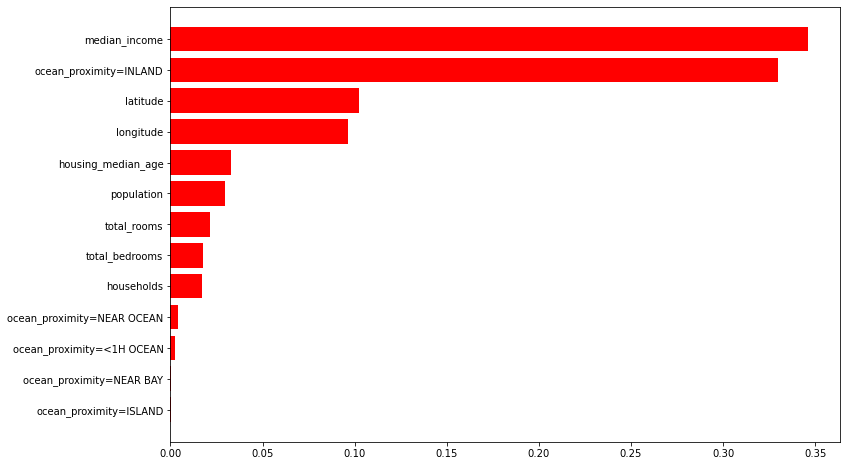

In [534]:
plt.figure(figsize=(12,8))
plt.barh(df.feature, df.importance, color  = 'red')
plt.show()

#### Question 6
- Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:
- xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
- Now change eta from 0.3 to 0.1.

In [550]:
import xgboost as xgb

In [581]:
import re
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(dv.transform(X_val), label=y_val, feature_names=features)

In [635]:
scores = []
for learning_rate in [0.3, 0.1, 0.5, 0.7, 1.0, 0.01, 0.001]:
    for num_tree in range(0,100):
        xgb_params = {
            'eta': learning_rate, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'reg:squarederror',
            'nthread': 8,

            'seed': 1,
            'verbosity': 1,
        }
        xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_tree) 
        xgb_predictions = xgb_model.predict(dval)  
        RMSE = np.sqrt(mean_squared_error(y_val, xgb_predictions)) 
        
        scores.append((learning_rate, num_tree, RMSE))
#         print(f'for learning rate of {i}, the RMSE is {RMSE}')

In [636]:
scores_df = pd.DataFrame(scores, columns=['learning_rate', 'num_trees', 'RMSE'])

In [637]:
scores_df.head()

,learning_rate,num_trees,RMSE
0,0.3,0,1.992167
1,0.3,1,1.394995
2,0.3,2,0.976953
3,0.3,3,0.684418
4,0.3,4,0.479765


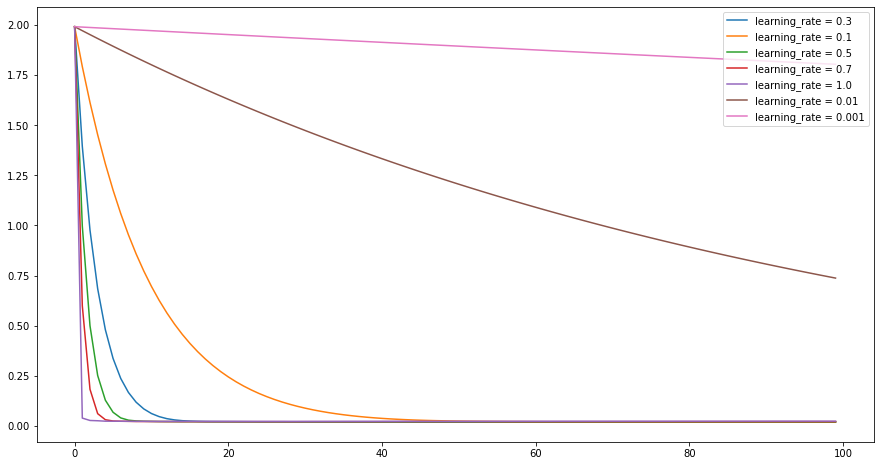

In [669]:
plt.figure(figsize=(15,8))
for i in [0.3, 0.1, 0.5, 0.7, 1.0, 0.01, 0.001]:
    subset = scores_df[scores_df.learning_rate == i]
    plt.plot(subset.num_trees, subset.RMSE, label = f'learning_rate = {i}')
        
#     plt.ylim(0.00, 0.1)
plt.legend(loc = 'upper right')
plt.show()